# KNN Exercise

![iris](images/iris.jpg)

We are going to use the famous **iris data set** again. 

The dataset consists of four attributes, which can be used to distinguish different iris species: 
* sepal-width
* sepal-length
* petal-width 
* petal-length. 


The task is to predict the class to which these plants belong. There are three classes in the dataset: **Iris-setosa, Iris-versicolor and Iris-virginica.** 

Further details of the dataset are available here.
https://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html

## Task

1. Please import and pre-process the data (as far as it's necessary). Afterwards split it in a train and test set, fit a KNN model and make predictions on the test set. The last step is to evaluate your model. Try to also scale your data and fit the model to the unscaled and scaled data. Can you see a difference in performance? 
If you can't it's because the original features are all on a very similar scale. Try multiplying one of the features by a factor of 10 and fitting the model to unscaled and scaled data. The difference should now be obvious 

2. Please also calculate the accuracy for K values of 1 to 40. In each iteration the accuracy for the predicted values of the test set is calculated and the result is appended to an error list.
The next step is to plot the accuracy values against K values.

In [79]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_breast_cancer
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [80]:
# Import data
df = pd.read_csv('./data/iris.csv')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [81]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [82]:
target_names = df['species'].unique()
df['species_cat'] = df.species.replace({target_names[0]: 0, target_names[1]:1, target_names[2]:2})
df

,sepal_length,sepal_width,petal_length,petal_width,species,species_cat
0,5.1,3.5,1.4,0.2,Iris-setosa,0
1,4.9,3.0,1.4,0.2,Iris-setosa,0
2,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5.0,3.6,1.4,0.2,Iris-setosa,0
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica,2
146,6.3,2.5,5.0,1.9,Iris-virginica,2
147,6.5,3.0,5.2,2.0,Iris-virginica,2
148,6.2,3.4,5.4,2.3,Iris-virginica,2


In [83]:
#features
X = df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
#target
y = df['species_cat']

In [98]:
# split train-test
x_train, x_test, y_train, y_test = train_test_split(X, y, random_state=10)

### Scaler scaled data

In [ ]:
# feature engineering
# scale data
from sklearn.preprocessing import MinMaxScaler

# Define the transformer
scaler = MinMaxScaler()

In [ ]:
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [ ]:
#create model & train it
knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
knn.fit(x_train_scaled, y_train)

In [ ]:
# predict test data
y_pred_scaled = knn.predict(x_test_scaled)

In [ ]:
print(classification_report(y_test, y_pred_scaled))
# Print accuracy score 
print("Accuracy:", accuracy_score(y_test, y_pred_scaled).round(2))
print("Recall:", recall_score(y_test, y_pred_scaled, average='macro').round(2))
print("-----"*10)

# Print confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred_scaled), annot=True, cmap='YlGn')


### scale factor 10 

In [99]:
x_train.head()

,sepal_length,sepal_width,petal_length,petal_width
118,7.7,2.6,6.9,2.3
141,6.9,3.1,5.1,2.3
26,5.0,3.4,1.6,0.4
43,5.0,3.5,1.6,0.6
59,5.2,2.7,3.9,1.4


In [100]:
x_train['sepal_length']= x_train['sepal_length']*10
x_train.head()

,sepal_length,sepal_width,petal_length,petal_width
118,77.0,2.6,6.9,2.3
141,69.0,3.1,5.1,2.3
26,50.0,3.4,1.6,0.4
43,50.0,3.5,1.6,0.6
59,52.0,2.7,3.9,1.4


In [101]:
x_test.head()

,sepal_length,sepal_width,petal_length,petal_width
87,6.3,2.3,4.4,1.3
111,6.4,2.7,5.3,1.9
10,5.4,3.7,1.5,0.2
91,6.1,3.0,4.6,1.4
49,5.0,3.3,1.4,0.2


In [102]:
x_test['sepal_length']= x_test['sepal_length']*10
x_test.head()

,sepal_length,sepal_width,petal_length,petal_width
87,63.0,2.3,4.4,1.3
111,64.0,2.7,5.3,1.9
10,54.0,3.7,1.5,0.2
91,61.0,3.0,4.6,1.4
49,50.0,3.3,1.4,0.2


In [103]:
#create model & train it
knn2 = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
knn2.fit(x_train, np.ravel(y_train))

KNeighborsClassifier(metric='euclidean')

In [104]:
# predict test data
y_pred = knn2.predict(x_test)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.93      0.97        15
           2       0.92      1.00      0.96        12

    accuracy                           0.97        38
   macro avg       0.97      0.98      0.98        38
weighted avg       0.98      0.97      0.97        38

Accuracy: 0.97
Recall: 0.98
--------------------------------------------------


<Axes: >

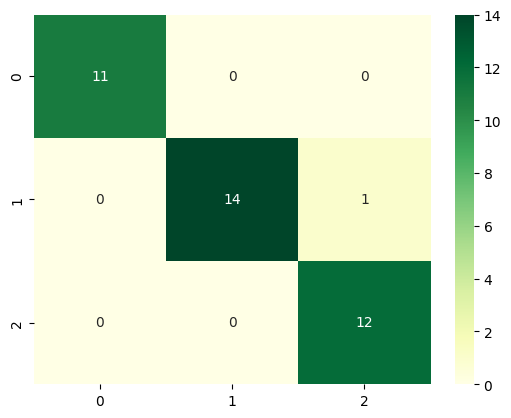

In [105]:
print(classification_report(y_test, y_pred))
# Print accuracy score 
print("Accuracy:", accuracy_score(y_test, y_pred).round(2))
print("Recall:", recall_score(y_test, y_pred, average='macro').round(2))
print("-----"*10)

# Print confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='YlGn')


2. Please also calculate the accuracy for K values of 1 to 40. In each iteration the accuracy for the predicted values of the test set is calculated and the result is appended to an error list.
The next step is to plot the accuracy values against K values.

In [106]:
error_list = []
for i in range(40):
    knn3 = KNeighborsClassifier(n_neighbors=i+1, metric='euclidean')
    knn3.fit(x_train, y_train)
    y_pred = knn3.predict(x_test)
    acc = accuracy_score(y_test, y_pred)
    error_list.append(acc)
    print(i, 'accuracy: ', acc )

0 accuracy:  0.9210526315789473
1 accuracy:  0.9210526315789473
2 accuracy:  0.9473684210526315
3 accuracy:  0.9736842105263158
4 accuracy:  0.9736842105263158
5 accuracy:  0.9473684210526315
6 accuracy:  0.9473684210526315
7 accuracy:  0.9210526315789473
8 accuracy:  0.8421052631578947
9 accuracy:  0.8421052631578947
10 accuracy:  0.7894736842105263
11 accuracy:  0.8157894736842105
12 accuracy:  0.8157894736842105
13 accuracy:  0.8421052631578947
14 accuracy:  0.8157894736842105
15 accuracy:  0.8421052631578947
16 accuracy:  0.8157894736842105
17 accuracy:  0.8157894736842105
18 accuracy:  0.7894736842105263
19 accuracy:  0.7894736842105263
20 accuracy:  0.7631578947368421
21 accuracy:  0.7894736842105263
22 accuracy:  0.7894736842105263
23 accuracy:  0.7894736842105263
24 accuracy:  0.7894736842105263
25 accuracy:  0.7894736842105263
26 accuracy:  0.7631578947368421
27 accuracy:  0.7631578947368421
28 accuracy:  0.7631578947368421
29 accuracy:  0.7894736842105263
30 accuracy:  0.7894

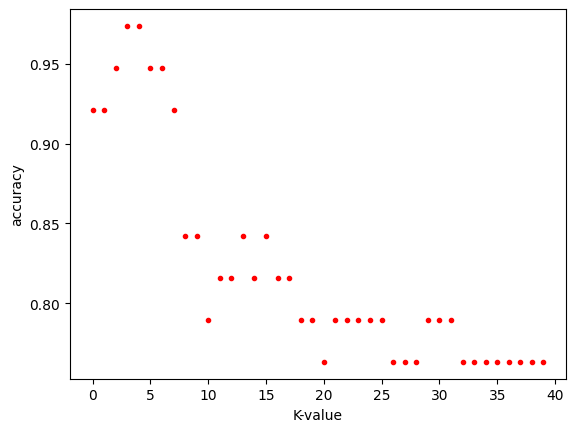

In [107]:
plt.plot(range(40), error_list, 'r.')
plt.xlabel('K-value')
plt.ylabel('accuracy')
plt.show()